In [6]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [45]:
df_diamonds = pd.read_csv('diamonds.csv')
df_diamonds

,index,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43,Very Low
1,2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31,Very Low
2,3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31,Very Low
3,4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63,Very Low
4,5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75,Very Low
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50,Very Low
53936,53937,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61,Very Low
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56,Very Low
53938,53939,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74,Very Low


In [11]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   index    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53940 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53940 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
 10  price    53940 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 4.5+ MB


In [12]:
df_diamonds.isna().sum()

index      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

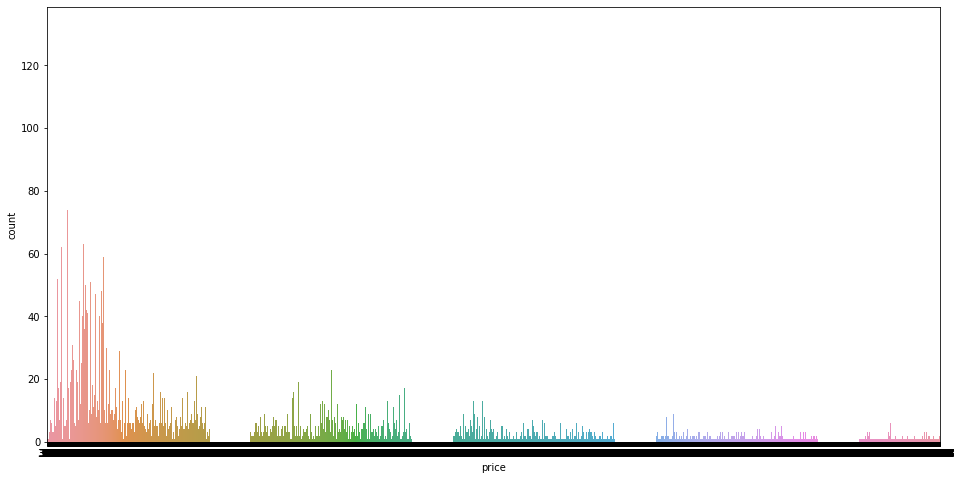

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 8))
diamonds = sns.load_dataset("diamonds")
ax = sns.countplot(x="price", data=diamonds)

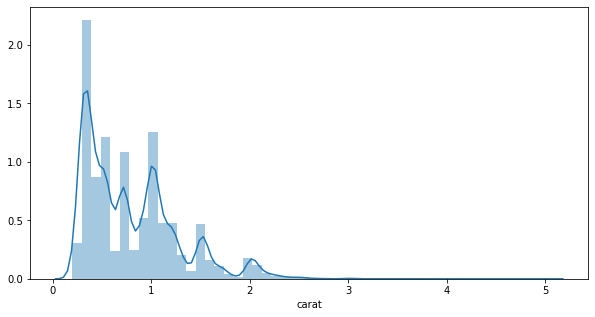

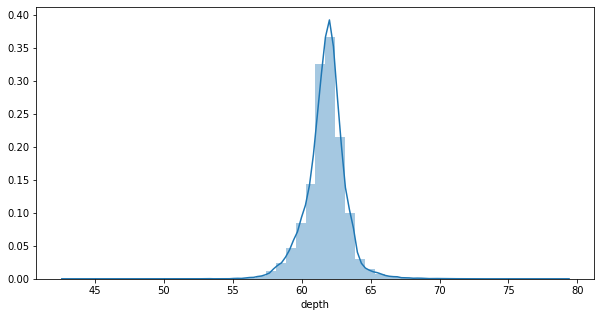

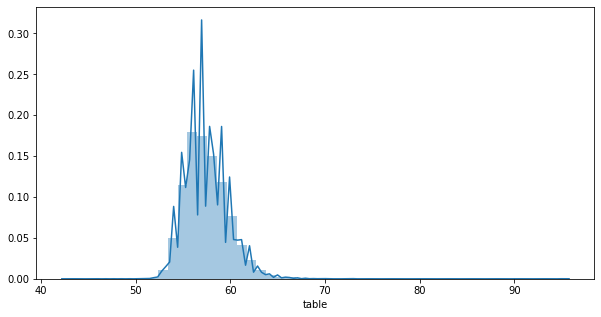

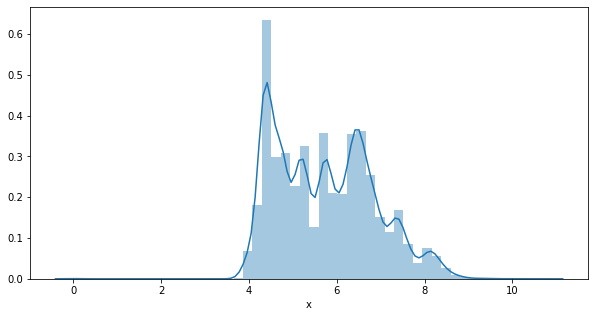

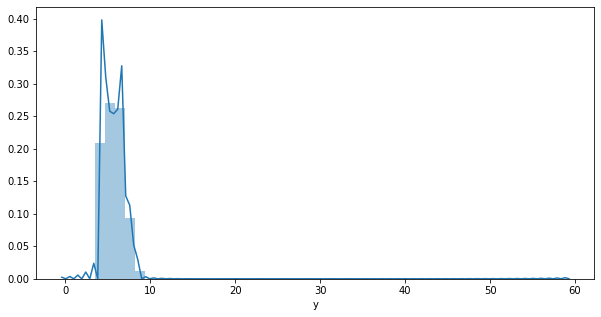

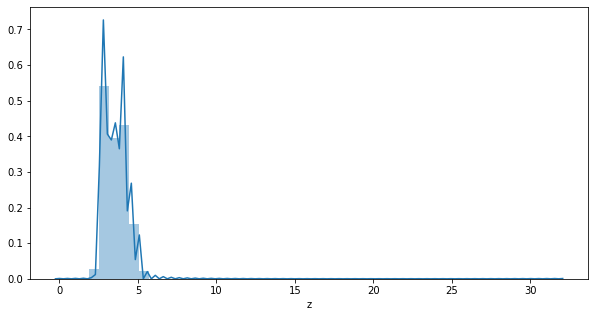

In [31]:
features = ["carat", "depth", "table", "x", "y", "z"]
for i in features:
    plt.figure(figsize=(10, 5))
    sns.distplot(df_diamonds[i])

In [32]:
df_diamonds.duplicated().sum()

0

In [57]:
# Dropping string features
df_new = df_diamonds.drop(["cut","color","clarity","price"],axis=1)

In [58]:
#Scaling
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
df_yeni = min_max_scaler.fit_transform(df_new)

In [64]:
# split the data into train and test set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X=df_yeni
y=df_diamonds['price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [66]:
model=DecisionTreeClassifier(max_depth=4, random_state=42) 
model.fit(X_train,y_train)
predictions=model.predict(X_test)

score=accuracy_score(y_test, predictions)
score

0.9933877147447782

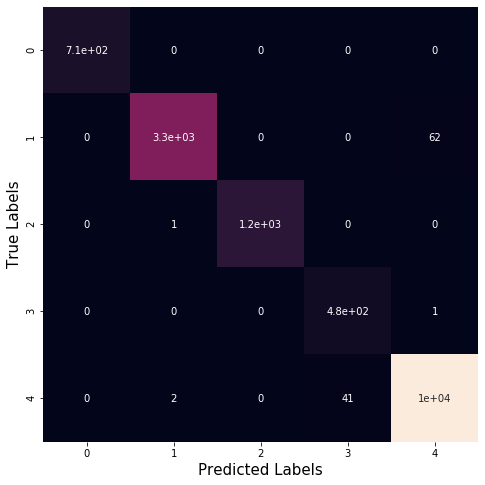

In [67]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

In [69]:
# Metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
print("Precision = {}".format(precision_score(y_test, predictions, average='macro')))
print("Recall = {}".format(recall_score(y_test, predictions, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, predictions)))
print("F1 Score = {}".format(f1_score(y_test, predictions,average='macro')))

Precision = 0.9829636131158649
Recall = 0.9949313699239702
Accuracy = 0.9933877147447782
F1 Score = 0.9886296870588405


In [1]:
print("Since test score is high there is no over or underfitting ")

Since test score is high there is no over or underfitting 
